In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://github.com/campusx-official/100-days-of-machine-learning/raw/refs/heads/main/day36-imputing-numerical-data/titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [8]:
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop(columns="Survived")
y=df["Survived"]
y.shape

(891,)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((712, 3), (179, 3), (712,), (179,))

In [25]:
X_age_mean_val=X_train["Age"].mean()
X_age_median_val=X_train["Age"].median()

X_Fare_mean_val=X_tarin["Fare"].mean()
X_Fare_median_val=X_train["Fare"].median()

X_train["age_mean"]=X_train["Age"].fillna(X_age_mean_val)
X_train["age_median"]=X_train["Age"].fillna(X_age_median_val)

X_train["Fare_mean"]=X_train["Fare"].fillna(X_Fare_mean_val)
X_train["Fare_median"]=X_train["Fare"].fillna(X_Fare_median_val)





In [27]:
X_train.sample(5)

,Age,Fare,Family,age_mean,age_median,Fare_mean,Fare_median
202,34.0,6.4958,0,34.0,34.0,6.4958,6.4958
11,58.0,26.5500,0,58.0,58.0,26.5500,26.5500
638,41.0,39.6875,5,41.0,41.0,39.6875,39.6875
721,17.0,7.0542,1,17.0,17.0,7.0542,7.0542
380,42.0,227.5250,0,42.0,42.0,227.5250,227.5250


In [29]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['age_median'].var())
print('Age Variance after mean imputation: ', X_train['age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


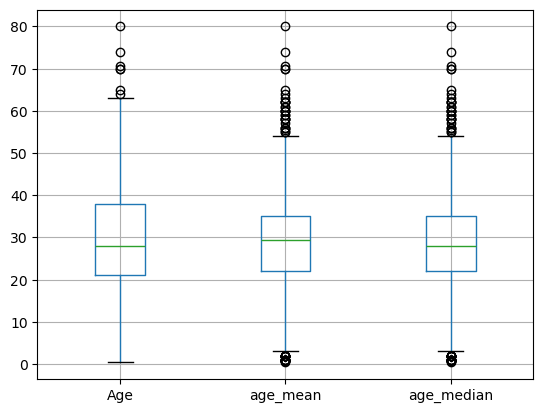

In [33]:
X_train[["Age","age_mean","age_median"]].boxplot()
plt.show()

<Axes: >

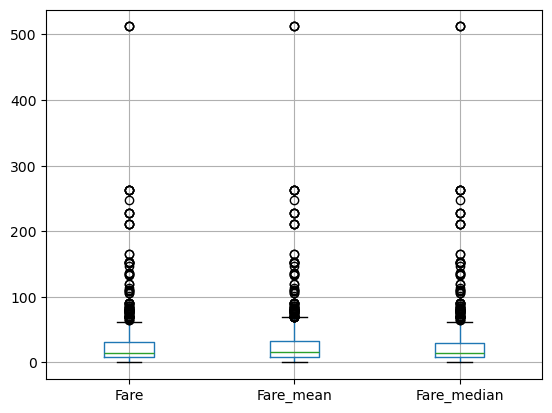

In [34]:
X_train[["Fare","Fare_mean","Fare_median"]].boxplot()


## using sklearn SimpleImputer

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [58]:

impute1=SimpleImputer(strategy="median")
impute2=SimpleImputer(strategy="mean")
trf=ColumnTransformer([
        ("impute1",impute1,["Age"]),
        ("impute2",impute2,["Fare"])
    ],remainder="passthrough")
trf.fit(X_train)




ColumnTransformer(remainder='passthrough',
                  transformers=[('impute1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('impute2', SimpleImputer(), ['Fare'])])

In [67]:

print(trf.named_transformers_['impute1'].statistics_)
print(trf.named_transformers_['impute2'].statistics_)

[28.75]
[32.61759689]


In [62]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [66]:
 X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])